In [ ]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import os

In [ ]:
import os
data = pd.read_csv("breast-cancer.csv")

In [ ]:
data= data.rename({"diagnosis": "malignant_cancer"}, axis= "columns")
X= data.drop(["id", "malignant_cancer"], axis= "columns")
y= data["malignant_cancer"]
y= y.map({"M": 1, "B": 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.25, random_state= 100)

In [ ]:
scaler= StandardScaler()

scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
rf_model= RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)

y_pred= rf_model.predict(X_test_scaled)

results_df = pd.DataFrame(
    data=[["Random Forest", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]], 
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df 


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.951049,0.962264,0.910714,0.93578


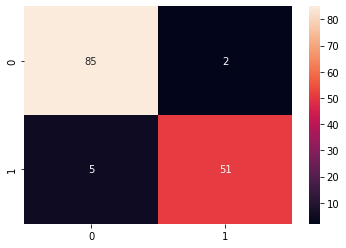

In [ ]:
cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)